<a href="https://colab.research.google.com/github/ayushxx7/pandas-course-project/blob/master/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1TyooF3dWsfH-U9u8Bp4g-jIZW1ufaD8C')

     |████████████████████████████████| 71kB 2.8MB/s 


### Data Analysis with Python: Zero to Pandas - Course Project Guidelines
#### (remove this cell before submission)

Make submissions here:  https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project

This is the starter notebook for the course project for [Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas). For the course project, you will pick a real-world dataset of your choice and apply the concepts learned in this course to perform exploratory data analysis. Use this starter notebook as an outline for your project (you can also start with an empty new notebook). Focus on documentation and presentation - this Jupyter notebook will also serve as a project report, so make sure to include detailed explanations whererver possible using Markdown cells.

#### Step 1: Select a real-world dataset 

- Find and download an interesting real-world dataset (see the Recommended Datasets section below for ideas). 

- The dataset should contain tabular data (rowsn & columns), preferably in CSV/JSON/XLS or other formats that can be read using Pandas. If it's not in a compatible format, you may have to write some code to convert it to a desired format.
- The dataset should contain at least 3 columns and 150 rows of data. You can also combine data from multiple sources to create a large enough dataset.


#### Step 2: Perform data preparation & cleaning

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


#### Step 3: Perform exploratory Analysis & Visualization

- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

#### Step 4: Ask & answer questions about the data

- Ask at least 5 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


#### Step 5: Summarize your inferences & write a conclusion

- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections
- Share ideas for future work on the same topic using other relevant datasets
- Share links to resources you found useful during your analysis


#### Step 6: Make a submission & share your work

- Upload your notebook to your Jovian.ml profile using `jovian.commit`.
- **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
- Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684

- Browse through projects shared by other participants and give feedback


#### (Optional) Step 7: Write a blog post

- A blog post is a great way to present and showcase your work.  
- Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
- Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
- Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml



### Recommended Datasets


Use the following resources for finding interesting datasets:

- [Recommended datasets for the course project](https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
- [awesome-public-datasets](https://github.com/awesomedata/awesome-public-datasets)
- [Google Dataset Search](https://datasetsearch.research.google.com)
- [Your personal data from online services](https://www.popsci.com/download-digital-personal-information/)



### Example Projects

Refer to these projects for inspiration:

* [Analyzing your browser history using Pandas & Seaborn](https://medium.com/free-code-camp/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51) by Kartik Godawat

* [WhatsApp Chat Data Analysis](https://jovian.ml/PrajwalPrashanth/whatsapp-chat-data-analysis) by Prajwal Prashanth

* [Analyzing Covid-19 data using Pandas](https://jovian.ml/aakashns/python-pandas-data-analysis) 

* [Understanding the Gender Divide in Data Science Roles](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b) by Aakanksha N S

* [2019 State of Javscript Survey Results](https://2019.stateofjs.com/demographics/)

* [2020 Stack Overflow Developer Survey Results](https://insights.stackoverflow.com/survey/2020)


### Evaluation Criteria

Your submission will be evaluated using the following criteria:

* Dataset must contain at least 3 columns and 150 rows of data
* You must ask and answer at least 5 questions about the dataset
* Your submission must include at least 5 visualizations (graphs)
* Your submission must include explanations using markdown cells, apart from the code.
* Your work must not be plagiarized i.e. copy-pasted for somewhere else.


**NOTE**: Remove this cell containing the instructions before making your submission. You can do using the "Edit > Delete Cells" menu option.

# Analyzing the Android App Store

Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about [the course](http://zerotopandas.com), and what you've learned from it.

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [2]:
project_name = "analyzing-the-android-app-store" # change this

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

In [9]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'

## Data Preparation and Cleaning

TODO

---



```
# This is formatted as code
```



In [5]:
import pandas as pd

In [76]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1A0Eu8KuHG8ZHi7qufUy9nNdA0yArEIor3_2Yv3RYZ2I/export?gid=0&format=csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


When plotting graph for Category against Type, found that there was a type `0`. However, only `Free` and `Paid` were expected. Hence, cleaned that entry using Pandas.

In [77]:
# First find out the rows which have incorrect data for `Type`
fix_this_row = df.loc[df['Type'] == "0"]
# Convert the dataframe to list for easy operation
list_to_fix = fix_this_row.values.tolist()
# Add add correct cateogy (checked on PlayStore)
list_to_fix[0].insert(1, "Lifestyle")
# remove the last element from the list as one element has been added in between
list_to_fix[0].pop(-1)

nan

In [78]:
# set the updated value for the row
df.loc[10472] = list_to_fix[0]
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        Lifestyle
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [69]:
# check if there are discrepencies in rating data
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [81]:
# fill the nan values with 0 to make the column numeric. 
# 0 is a value we can ignore later on as well, because no app can have 0 ratings
df.Rating = df.Rating.fillna(0)
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 0. , 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [83]:
df.Rating = df.Rating.astype(float)
df['Round Rating'] = df.Rating.round().astype(int)
df['Round Rating'].unique()

array([4, 5, 3, 0, 2, 1])

In [84]:
# make the Installs column to numeric (int)
df.Installs = df['Installs'].replace({'\+': ''}, regex=True)
df.Installs = df['Installs'].replace({',': ''}, regex=True)

df.Installs = df.Installs.astype(int)
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: int64

In [85]:
# make the Price numeric (float)
df.Price = df['Price'].replace({'\$': ''}, regex=True)
df.Price = df.Price.astype(float)
df.Price.unique()
df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [86]:
# convert the last update column to datetime
df["Last Updated"] = pd.to_datetime(df['Last Updated'])
df["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

In [87]:
# check if any columns have nan value
for key in df:
  print("KEY:", key)
  print(df.loc[df[key].isnull()])
  print("\n")

KEY: App
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Round Rating]
Index: []


KEY: Category
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Round Rating]
Index: []


KEY: Rating
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Round Rating]
Index: []


KEY: Reviews
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Round Rating]
Index: []


KEY: Size
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Round Rating]
Index: []


KEY: Installs
Empty DataFrame
Columns: [App, Category, Ra

In [88]:
# checking if any meaningful info can be extracted from Android Version
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [206]:
# Removing duplicate entries for same App
df.drop_duplicates(subset="App", keep='first', inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,5
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,4
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06,1,4.1 and up,5
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,1000,Free,0.0,Everyone,Medical,2017-01-20,1,2.2 and up,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,4


In [89]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'

## Exploratory Analysis and Visualization

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

Number of Apps in each Category

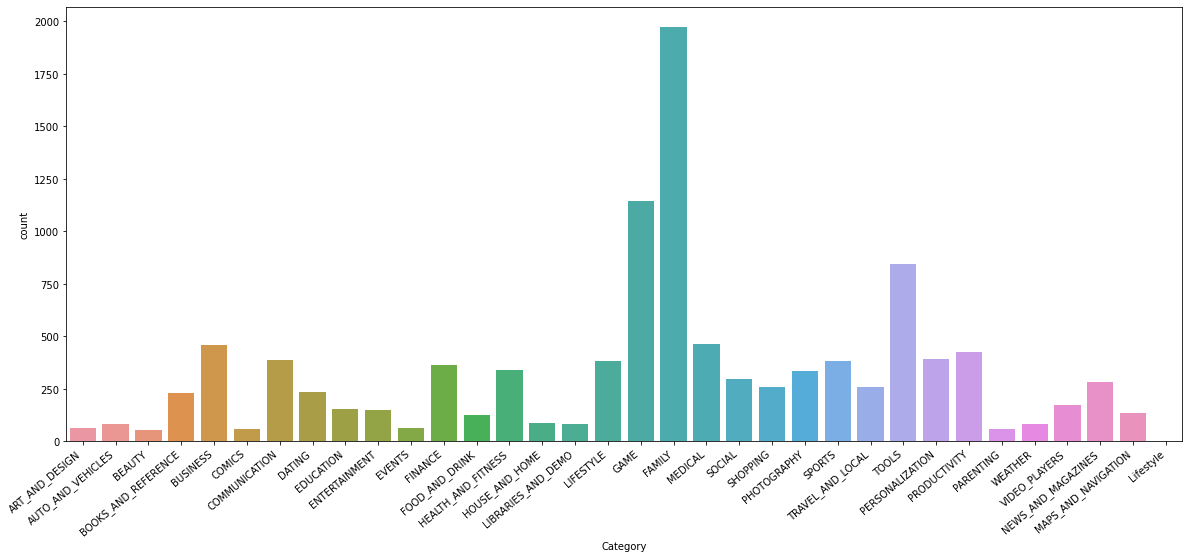

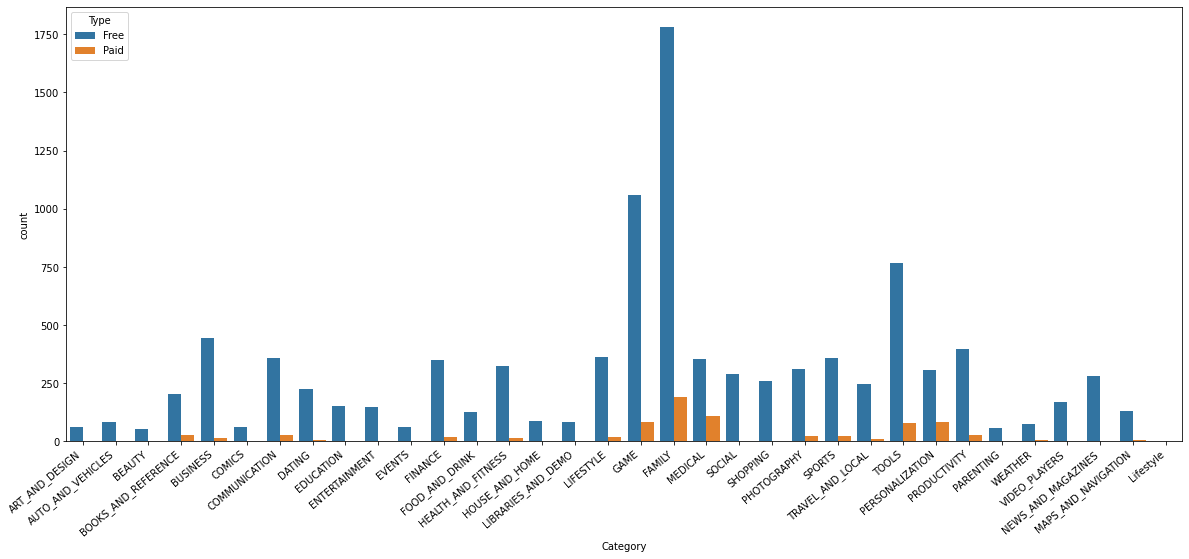

In [141]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="Category", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

plt.figure(figsize=(20,8))
ax = sns.countplot(x="Category", hue="Type", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Distribution of Free and Paid Apps across the App Store

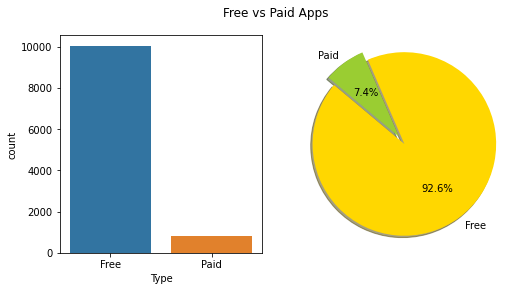

In [117]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4))

plt.suptitle('Free vs Paid Apps')

ax = sns.countplot(x="Type", data=df, ax=ax1)

labels = 'Free', 'Paid'
sizes = [df.Type.value_counts()[0], df.Type.value_counts()[1]]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


plt.show()

Averaging Rating against App Type & App Installs


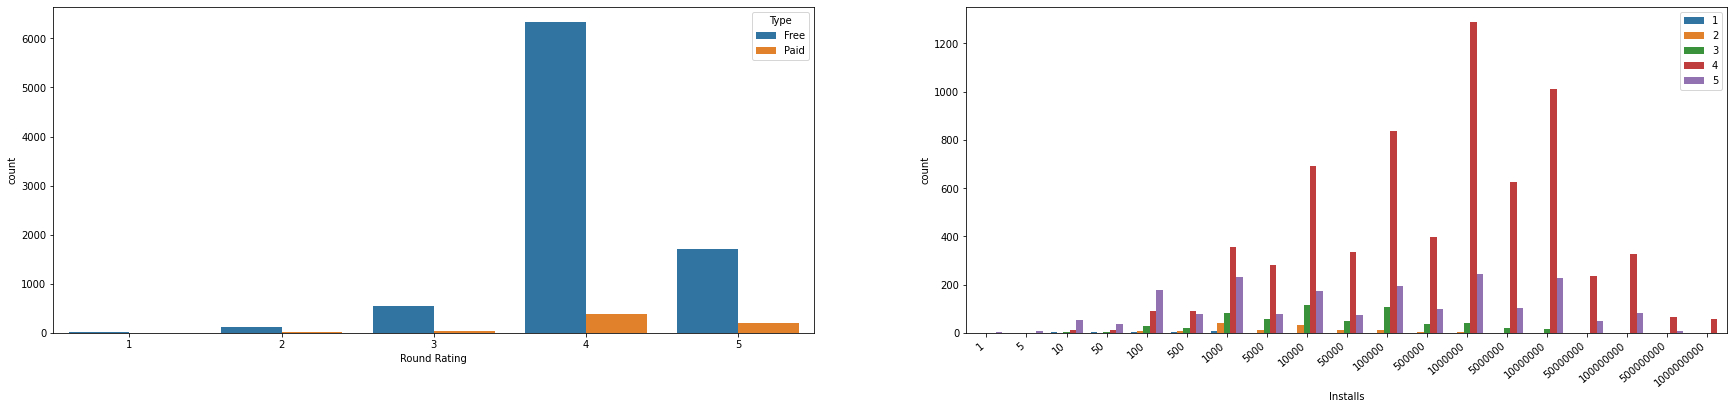

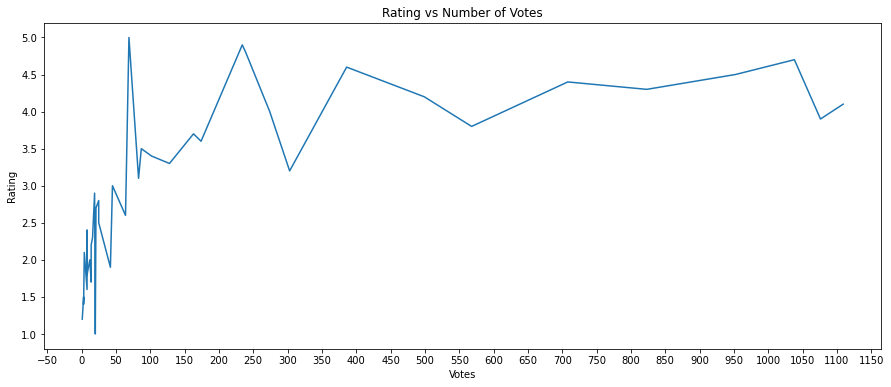

In [174]:
import seaborn as sns
import matplotlib.ticker as ticker

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,6))

mask = df['Round Rating'].isin([0])
ax = sns.countplot(x="Round Rating", hue="Type", data=df[~mask], ax=ax1)

ax2 = sns.countplot(x="Installs", hue="Round Rating", data=df[~mask], ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.legend(loc='upper right')
plt.show()

mask = df.Rating.isin([0])
rating_fixed_df = df[~mask]

fig, ax = plt.subplots(1,1, figsize=(15,6))
tick_spacing = 50
ax.plot(rating_fixed_df.Rating.value_counts().tolist(),rating_fixed_df.Rating.unique().tolist())
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Rating vs Number of Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

Category vs Content Rating

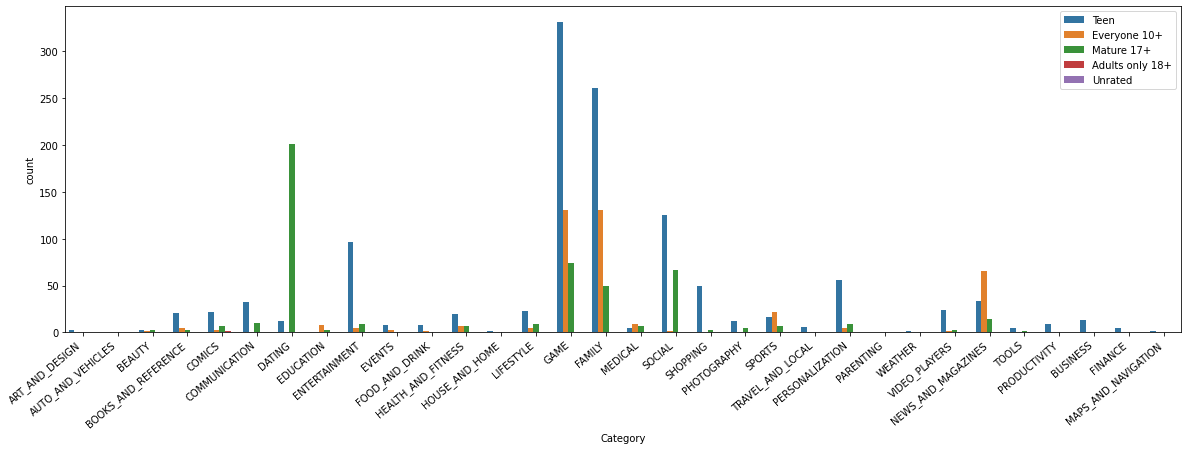

In [118]:
plt.figure(figsize=(20,6))
mask = df['Content Rating'].isin(['Everyone'])
ax = sns.countplot(x="Category", hue="Content Rating", data=df[~mask])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.legend(loc='upper right')
plt.show()

Top 10 Apps by Installs and Ratings

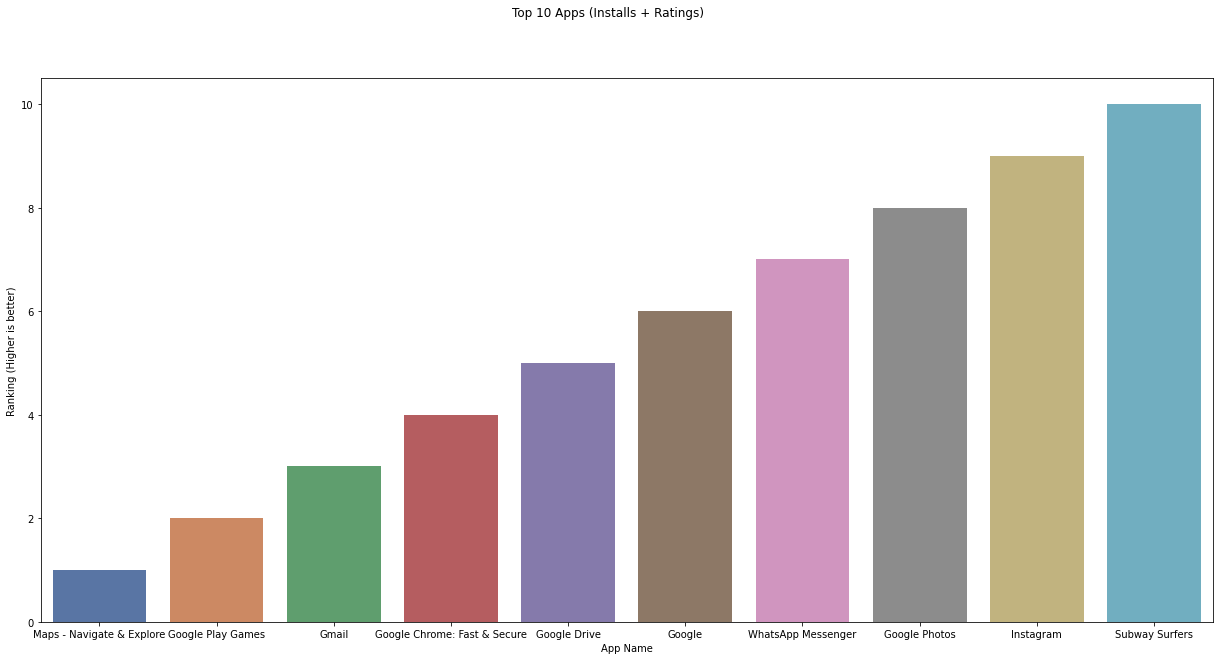

In [245]:
x1 = df.sort_values(['Installs', 'Rating'], ascending=False).head(10)
x1 = x1['App'].tolist()[::-1]
import numpy as np

plt.figure(figsize=(21,10))
y1 = np.arange(1, 11)
sns.barplot(x=x1, y=y1, palette="deep")
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")
plt.suptitle("Top 10 Apps (Installs + Ratings)")
plt.xlabel('App Name')
plt.ylabel('Ranking (Higher is better)')
plt.show()

Category vs Install Percentage Distribution

In [124]:
dfp = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()

import plotly.graph_objects as go

category = list(dfp.Category)
installs = list(dfp.Installs)

fig= go.Figure(go.Treemap(
    
    labels =  category,
    parents=[""]*len(category),
    values =  installs,
    textinfo = "label+percent entry"
))
fig.update_layout(
    autosize=False,
    width= 800,
    height=800,)

fig.show()

In [247]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,5
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4


Stats for Rating

In [269]:
import scipy.stats as sc
mask = df['Rating'].isin([0])
masked_df = df[~mask]
print("---Stats for Rating---")
print(f"Mean of Rating: {np.mean(masked_df['Rating'])}")
print(f"Median of Rating: {np.median(masked_df['Rating'])}")
print(f"Mode of Rating: {sc.mode(masked_df['Rating'])[0][0]}")
print(f"Rating ranges from minimum:{masked_df.Rating.min()} to maximum:{masked_df.Rating.max()}")
print(f"Stadard Deviation of Rating: {np.std(masked_df['Rating'])}")
print(f"Variance of Rating: {np.var(masked_df['Rating'])}")

---Stats for Rating---
Mean of Rating: 4.1729657191655525
Median of Rating: 4.3
Mode of Rating: 4.3
Rating ranges from minimum:1.0 to maximum:5.0
Stadard Deviation of Rating: 0.5371463421826722
Variance of Rating: 0.2885261929202244


In [294]:
df.Reviews = df.Reviews.astype(int)
print("---Stats for Reviews---")
print(f"Mean of Reviews: {np.mean(df['Reviews'])}")
print(f"Median of Reviews: {np.median(df['Reviews'])}")
print(f"Mode of Reviews: {sc.mode(df['Reviews'])[0][0]}")
print(f"Reviews ranges from minimum:{df.Reviews.min()} to maximum:{df.Reviews.max()}")
print(f"Stadard Deviation of Reviews: {np.std(df['Reviews'])}")
print(f"Variance of Reviews: {np.var(df['Reviews'])}")

---Stats for Reviews---
Mean of Reviews: 216570.14420289855
Median of Reviews: 967.0
Mode of Reviews: 0
Reviews ranges from minimum:0 to maximum:78158306
Stadard Deviation of Reviews: 1831131.304449587
Variance of Reviews: 3353041854135.246


In [295]:
print("---Stats for Installs---")
print(f"Mean of Installs: {np.mean(df['Installs'])}")
print(f"Median of Installs: {np.median(df['Installs'])}")
print(f"Mode of Installs: {sc.mode(df['Installs'])[0][0]}")
print(f"Installs ranges from minimum:{df.Installs.min()} to maximum:{df.Installs.max()}")
print(f"Stadard Deviation of Installs: {np.std(df['Installs'])}")
print(f"Variance of Installs: {np.var(df['Installs'])}")

---Stats for Installs---
Mean of Installs: 7776701.710869566
Median of Installs: 100000.0
Mode of Installs: 1000000
Installs ranges from minimum:0 to maximum:1000000000
Stadard Deviation of Installs: 53752771.58216836
Variance of Installs: 2889360452764766.5


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round Rating
8872,Eat Right Diet (by Dt Shreya's Family Diet Cli...,HEALTH_AND_FITNESS,0.0,0,12M,10,Free,0.00,Everyone,Health & Fitness,2018-08-07,1.0.7,5.0 and up,0
8081,CX Network,BUSINESS,0.0,0,10M,0,Free,0.00,Everyone,Business,2018-08-06,1.3.1,4.1 and up,0
9074,DY Fitness,HEALTH_AND_FITNESS,0.0,0,43M,10,Free,0.00,Everyone,Health & Fitness,2018-08-06,4.4.1,4.1 and up,0
2441,PCOS Guide - Fight PCOS naturally,MEDICAL,0.0,0,5.1M,100,Free,0.00,Everyone,Medical,2018-08-04,1,5.0 and up,0
6229,Radio Belo Horizonte,FAMILY,0.0,0,4.3M,10,Free,0.00,Mature 17+,Entertainment,2018-08-03,2,4.0 and up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8112,VAT check CY,BUSINESS,0.0,0,642k,100,Free,0.00,Everyone,Business,2013-05-18,1.0.16,1.6 and up,0
9652,EO Forum,BUSINESS,0.0,0,1.1M,100,Free,0.00,Everyone,Business,2013-04-05,1.1,2.1 and up,0
6753,BS Detector - Diss 'n' Gauges,FAMILY,0.0,0,842k,50,Paid,1.49,Everyone,Entertainment,2013-02-22,1.3,2.2 and up,0
5977,Car Driving Theory Test BC,FAMILY,0.0,0,2.2M,10,Paid,1.49,Everyone,Education,2012-04-09,1,2.1 and up,0


In [73]:
import jovian

In [297]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'

## Asking and Answering Questions

TODO

In [ ]:
import datetime
x = df.loc[df.Reviews == 0]
x.sort_values(by=('Last Updated'), ascending=False)

In [ ]:
import jovian

In [296]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: Please provide the project argument e.g. jovian.commit(project='my-project')


## Inferences and Conclusion

TODO

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

### StackOverflow

- [Select specific rows based on column value](https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values)

- [Find NaN values in column](https://stackoverflow.com/a/43831589/7048915)

- [Replace part of value](https://stackoverflow.com/questions/38565849/pandas-replace-substring-in-string)

- [How to ignore rows when column values matcha a criteria](https://stackoverflow.com/a/22392870/7048915)

Other Q&A Sources
- [How to fill NaN values in a column](https://www.kite.com/python/answers/how-to-replace-nan-values-with-zeros-in-a-column-of-a-pandas-dataframe-in-python#:~:text=Use%20pandas.,name%20from%20the%20DataFrame%20df%20.)

- [Plot a Piechart](https://pythonspot.com/matplotlib-pie-chart/)

- [Line Plot](https://datatofish.com/line-chart-python-matplotlib/)

- [Change number of ticks on an axis](https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib)

- [Plot mutiple plots at same level in notebook](https://stackoverflow.com/questions/58887571/plotting-2-pie-charts-side-by-side-in-matplotlib)

- [Drop duplicates](https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/)

In [34]:
import jovian

In [125]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'